# Titanic Surival

<img src="all/titanic.jpg">

### There are three primary goal of this project.
 #### 1. Do a statistical analysis of how some group of people was survived more than other.
 #### 2. Do an exploratory data analysis(EDA) of titanic with visualizations and storytelling.
 #### 3. Predict: Use machine learning classification models to predict the chances of passengers survival.

## Importing Necessary Libraries and datasets.

### 1. Loading libraries

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 

import pandas as pd

#numpy for mathematical operation

import numpy as np

#some visulaization libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os


### 2. Loading datasets

In [2]:
train = pd.read_csv("all/train.csv")
test =  pd.read_csv("all/test.csv")

### A glimpse of the datasets

In [3]:
# Take a look at train datasets
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.00,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.00,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.00,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.85,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.00,NaN,S


In [4]:
# Take a look at test datasets
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
366,1258,3,"Caram, Mr. Joseph",male,NaN,1,0,2689,14.4583,NaN,C
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.00,0,0,17475,26.5500,NaN,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.00,2,0,11770,25.7000,C101,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S


In [5]:
# More information about datasets
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non

## About this data set

The data has split into two groups:

training set (train.csv)<br/>
test set (test.csv)

The training set includes our target variable(dependent variable), passenger survival status(also known as the ground truth from the Titanic tragedy) along with other independent features like gender, class, fare, and Pclass.

The test set should be used to see how well our model performs on unseen data. When we say unseen data, we mean that the algorithm or machine learning models have no relation to the test data. We do not want to use any part of the test data in any way to modify our algorithms; Which are the reasons why we clean our test data and train data separately. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...

### Categorical:

#### Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    Cabin
    Embarked(Port of Embarkation)
     C(Cherbourg)
     Q(Queenstown) 
     S(Southampton)
    
#### Dichotomous(Nominal variable with only two categories)

    Sex
        Female
        Male
        Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)<br/>
    Pclass (A proxy for socio-economic status (SES))<br/>
        1(Upper)<br/>
        2(Middle) <br/>
        3(Lower)<br/>
    
### Numeric:

    Discrete
        Passenger ID(Unique identifing # for each passenger)
        SibSp
        Parch
        Survived (Our outcome or dependent variable)
           0
           1
    Continous
        Age
        Fare

### Text Variable

    Ticket (Ticket number for passenger.)
    Name( Name of the passenger.)

## Part 2-Overview and cleaning of data

### 2(a). Overview

In [6]:
# Saving passenger id in advance in order to submit later
passengerid = test.PassengerId

# We will drop passengerID and Ticket since it will be useless for our data.

#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'],axis=1,inplace=True)

print (train.info())
print ("-"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

It looks like, the features have unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons...

    We may have missing values in our features.
    We may have categorical features.
    We may have alphanumerical or/and text features.

### 2(b) Dealing with missing values

#### Missing values in train dataset

In [7]:
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### Missing values in test dataset

In [8]:
total = test.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'],sort = False)

,Total,Percent
Cabin,327.0,77.10
Age,86.0,19.87
Fare,1.0,0.00
Embarked,0.0,0.22
Ticket,0.0,0.00
Parch,0.0,0.00
SibSp,0.0,0.00
Sex,0.0,0.00
Name,0.0,0.00
Pclass,0.0,0.00


#### Embarked feature

In [9]:
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
## creating a df with th
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))
## concating percent and total dataframe

total.columns = ["Total"]
percent.columns = ['Percent']
pd.concat([total, percent], axis = 1)

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


There are two NaN value for embarked feature

#### Lets find out which row have these NaN value for embarked feature

In [10]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the Fare is distributed among all Pclass and Embarked feature values

C:\Users\ravim\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


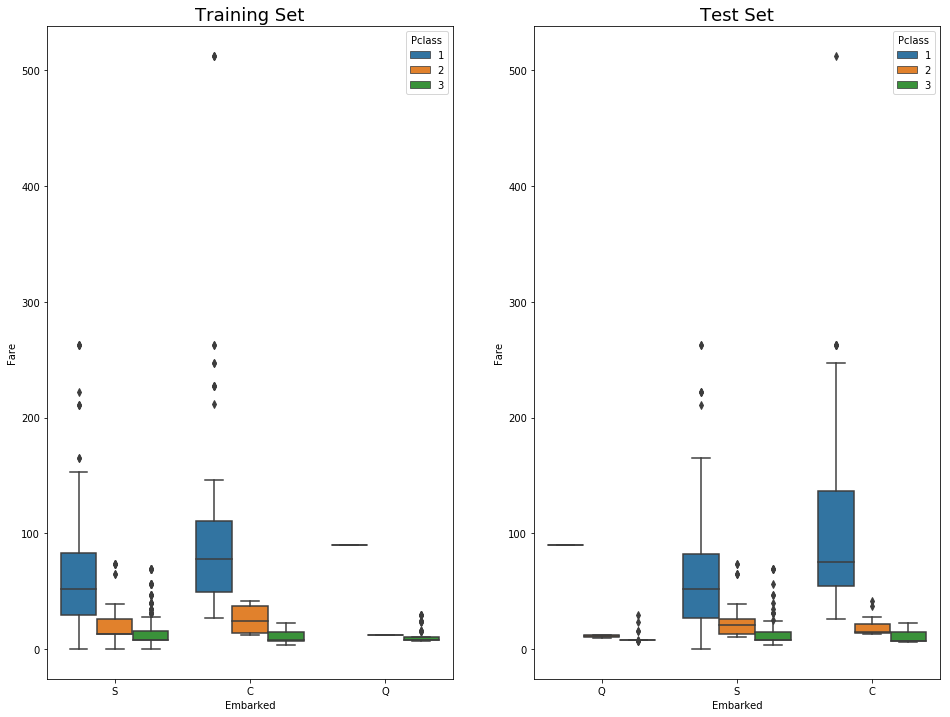

In [11]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

Here, in both training set and test set, the average fare closest to $80 are in the C Embarked values. So, let's fill in the missing values as "C"

In [12]:
## Replacing the null values in the Embarked column with the C.
train.Embarked.fillna("C", inplace=True)

#### Cabin Feature

In [13]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

    we can either get rid of the whole feature, or
    we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin records had a higher socio-economic-status then others. We may also say passengers with cabin records were more likely to be taken into consideration when loading into the boat.
Let's combine train and test data first and for now will assign all the null values as "N"

In [14]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

All the cabin names start with an English alphabet following by digits. It seems like there are some passengers that had booked multiple cabin rooms in their name, This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.


In [15]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

We can use pythons groupby function to get the mean of each cabin letter.

In [16]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. Let's write a simple function so that we can give cabin names based on the means.

In [17]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

Let's apply cabin_estimator function in each unknown cabins(cabin with null values). Once that is done we will separate our train and test to continue towards machine learning modeling.

In [18]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
with_N.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,G,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F,S


In [20]:
## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [21]:
train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0


In [22]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,G,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S


### Fare Feature

In [23]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


Here, We can take the average of the Fare column with all the values to fill in for Nan Fare value. However, that might not be the best way to fill in this value. We can be a little more specific and take the average of the values wherePclass is 3, Sex is male and Embarked is S

In [24]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)


C:\Users\ravim\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
train[train.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [26]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


Some standard approaches of dealing with null values are mean, median and mode. However, we will take a different approach since ~20% data in the Age column is missing in both train and test dataset. The age variable seems to be promising for determining survival rate. Therefore, It would be unwise to replace the missing values with median, mean or mode. We will use machine learning model Random Forest Regressor to impute missing value instead of Null value. We will keep the age column unchanged for now and work on that in the feature engineering section.

### Visulaization and Feature Relations

Before we dive into finding relations between different features and our dependent variable(survivor) let us create some predictions about how the relations may turnout among features.

Predictions:

    Gender: More female survived than male
    Pclass: Higher socio-economic status passenger survived more than others.
    Age: Younger passenger survived more than other passengers.
Now, let's see how the features are related to each other by creating some visualizations.

#### Gender and Surived

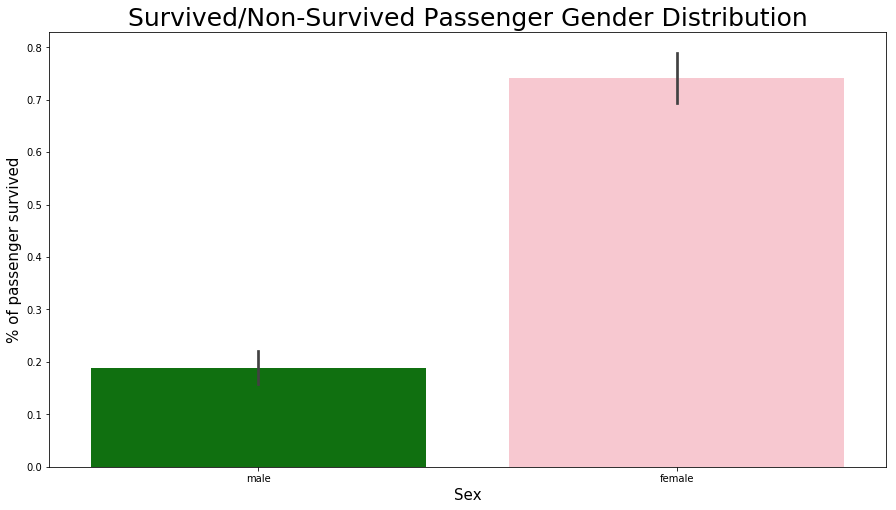

In [27]:
pal = {'male':"green", 'female':"Pink"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);

This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

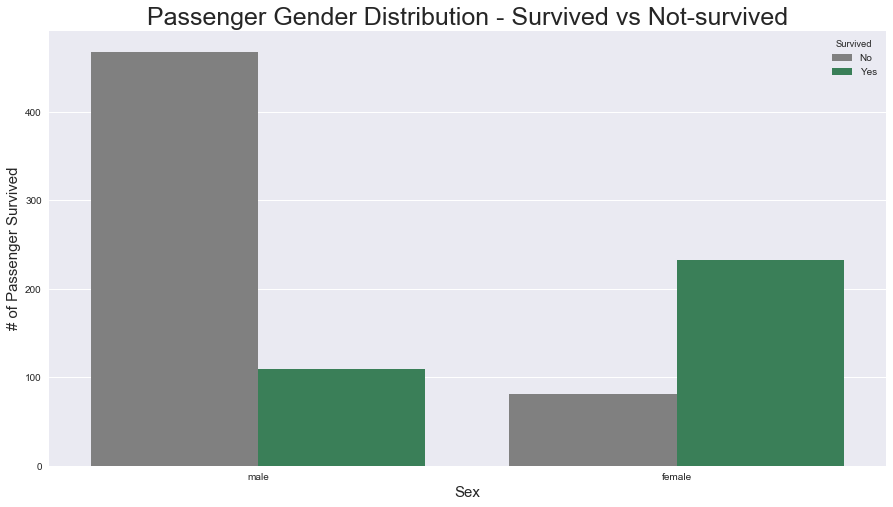

In [28]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

Summary

    As we suspected, female passengers have survived at a much better rate than male passengers.
    It seems about right since females and children were the priority.

### Pclass and survived

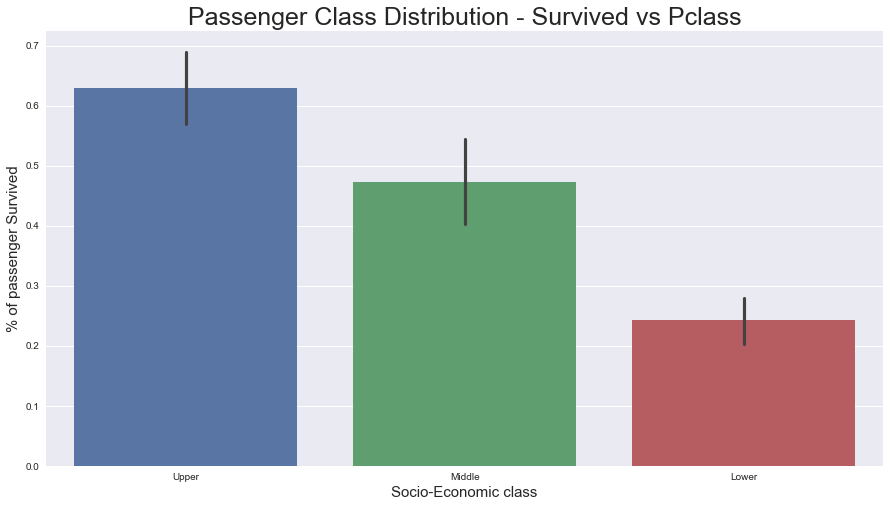

In [29]:
#pal = {'3':"green", 'Middle':"Pink",'Lower':"black"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2 )
plt.title("Passenger Class Distribution - Survived vs Pclass", fontsize = 25)
plt.ylabel("% of passenger Survived", fontsize = 15)
plt.xlabel("Socio-Economic class",fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']


val = [0,1,2]  ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

It looks like ...
    1. ~63% first class passenger survived titanic tragedy, while
    2. ~ 48% second class and
    3. ~ only 24% third class passenger survived.

##### Kernel Density plot

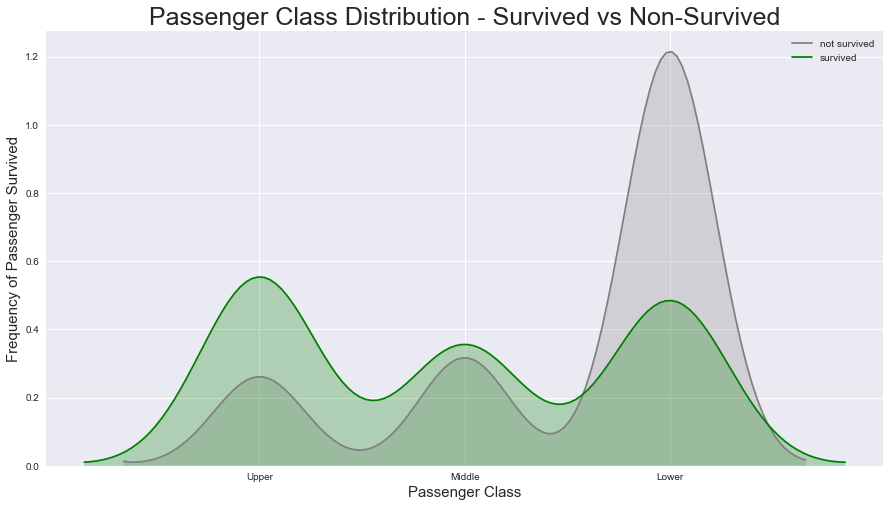

In [30]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

In [31]:
train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0


#### Summary

The first class passengers had the upper hand during the tragedy than second and third.

Text(0.5,0,'Fare')

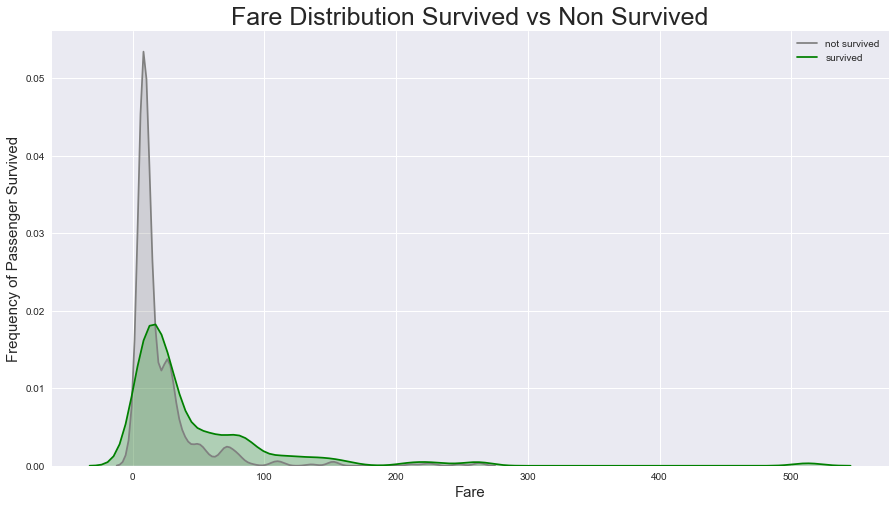

In [32]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

This plot shows something impressive..

1. The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
2. When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check..

In [33]:
train[train.Fare>280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now.

#### Age And Survived

C:\Users\ravim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ravim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


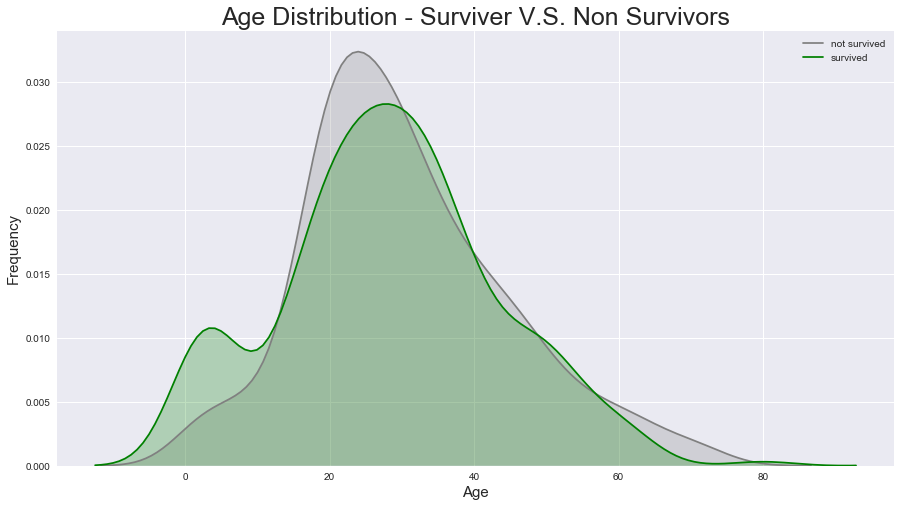

In [34]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);


 It proves that children and infants were the priority

#### Combined Feature Relation

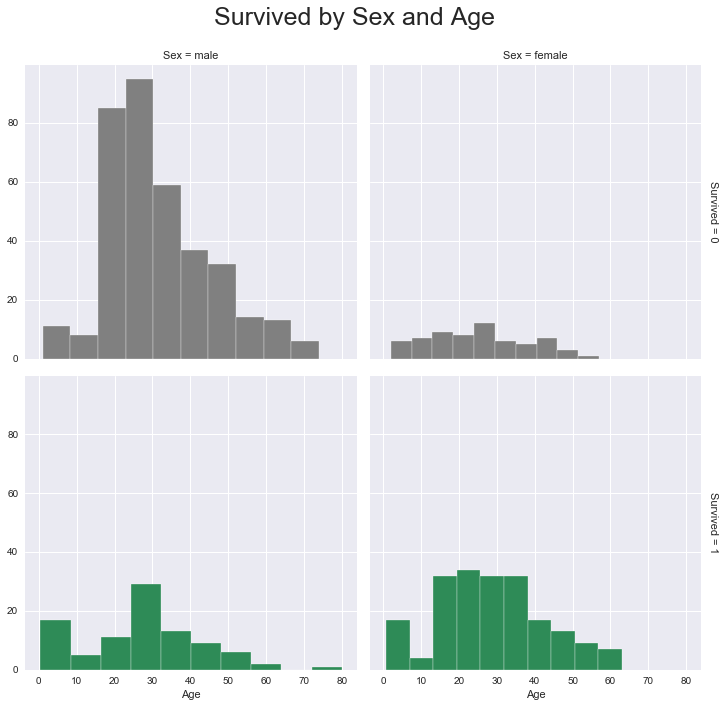

In [35]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

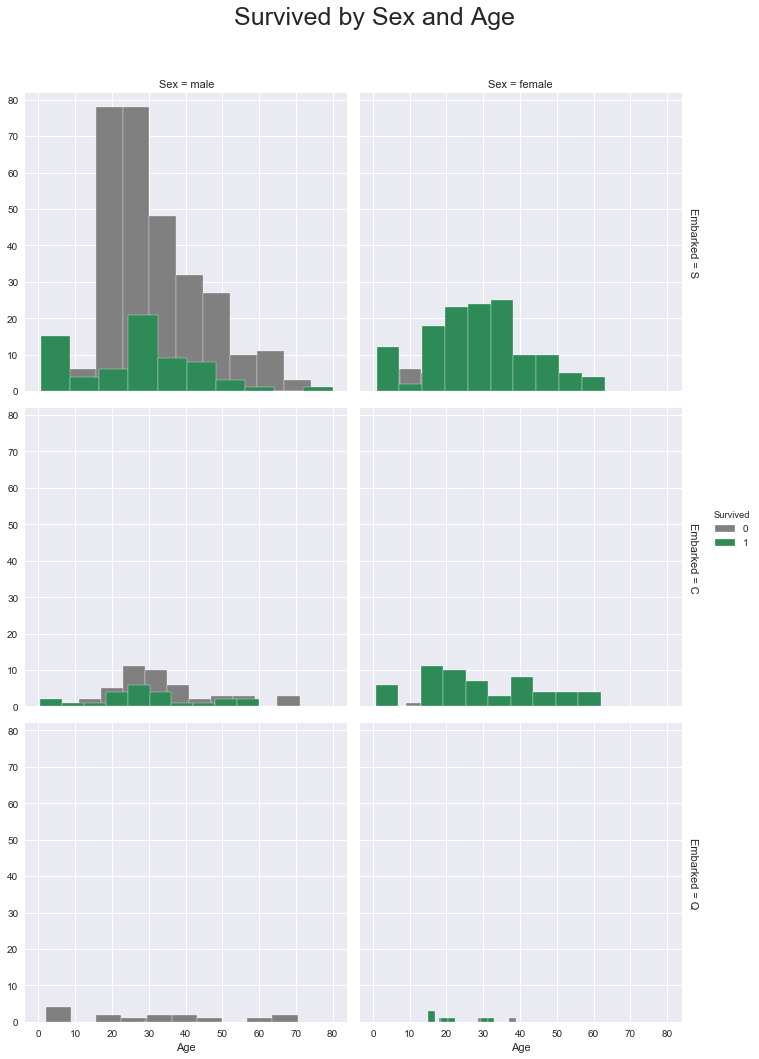

In [36]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are Embarked, Age, Survived & Sex.

1. The color illustrates passengers survival status(green represents survived, gray represents not survived)
2. The column represents Sex(left being male, right stands for female)
3. The row represents Embarked(from top to bottom: S, C, Q)
4. Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data.

Most passengers seem to be boarded on Southampton(S).
1. More than 60% of the passengers died boarded on Southampton.
2. More than 60% of the passengers lived boarded on Cherbourg(C).
3. Pretty much every male that boarded on Queenstown(Q) did not survive.
4. There were very few females boarded on Queenstown, however, most of them survived.


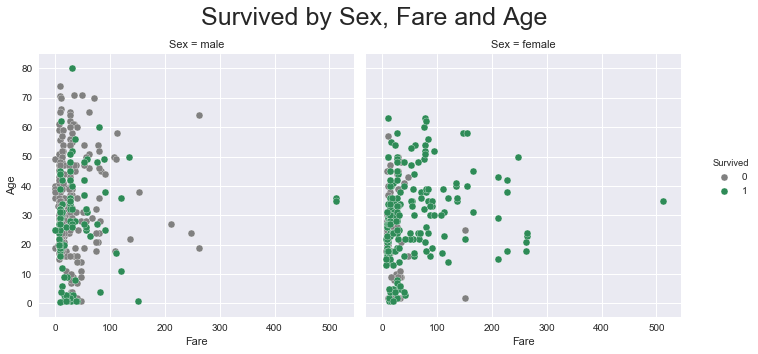

In [37]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

This grid unveils a couple of interesting insights. Let's find out.

The facet grid above clearly demonstrates the three outliers with Fare of over dollar500. **At this point, I think we are quite         confident that these outliers should be deleted.**
Most of the passengers were with in the Fare range of $100.

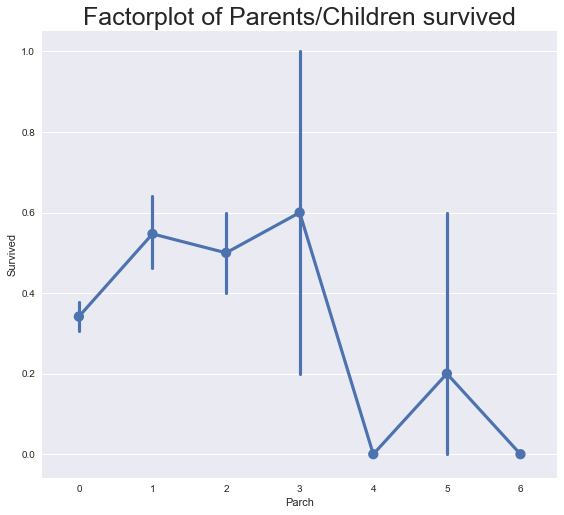

In [38]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**Passenger who traveled in big groups with parents/children had less survival rate than other passengers.**

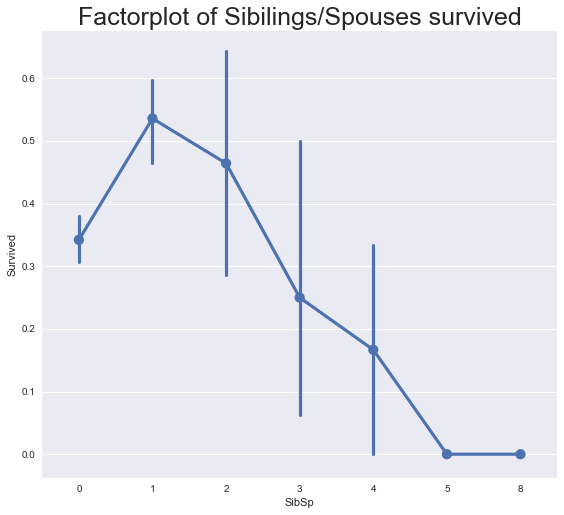

In [39]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**While, passenger who traveled in small groups with sibilings/spouses had more survival rate than other passengers.**

## Part 4---- Stastical Overview

In [40]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [41]:
train[['Pclass','Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.624413
2,0.472826
3,0.242363


In [42]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,28.270627,0.477876,0.466077,44.289799


In [43]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,female,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,male,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [44]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,25.140620,0.615071,0.393075,13.675550,0.242363


I have gathered a small summary from the statistical overview above. Let's see what they are...

This data set has 891 raw and 9 columns.
1. only 38% passenger survived during that tragedy.
2. ~74% female passenger survived, while only ~19% male passenger survived.
3. ~63% first class passengers survived, while only 24% lower class passenger survived.

### 4(a) Correlation and Heatmap

In [45]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,G,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S


In [46]:
train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0


In [47]:
train.loc[train.Sex=='male','Sex']=1
train.loc[train.Sex=='female','Sex']=0
test.loc[test.Sex=='male','Sex']=1
test.loc[test.Sex=='female','Sex']=0

C:\Users\ravim\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G,S,0


In [49]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


**Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass.**

In [50]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

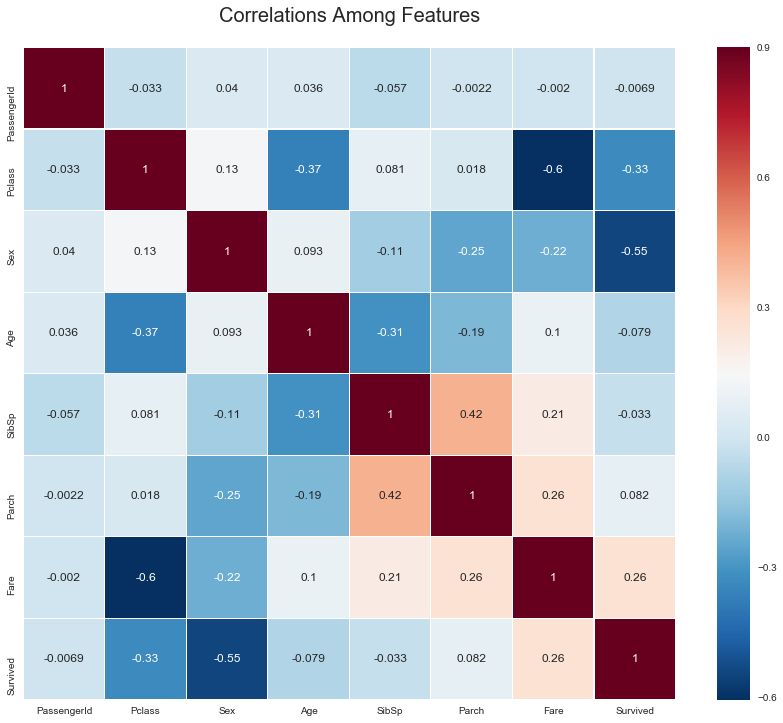

In [51]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

Positive Correlation Features:

Fare and Survived: 0.26

Negative Correlation Features:

Fare and Pclass: -0.6

Sex and Survived: -0.55

Pclass and Survived: -0.33

So, Let's analyze these correlations a bit.

We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

## Part 5: Feature Engineering

Feature Engineering is exactly what its sounds like. Sometimes we want to create extra features from with in the features that we have, sometimes we want to remove features that are alike. Features engineering is the simple word for doing all those. It is important to remember that we will create new features in such ways that will not cause multicollinearity(when there is a relationship among independent variables) to occur.

### Name_length

**Creating new feature "name_length" that will take the count of letter of each name**

In [52]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 


## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [53]:
print (train.shape[1])
print (test.shape[1])

14
13


### Title

**Getting the title of each name as new feature**

In [54]:
## get the title from the name
#train["title"] = [i.split('.')[0] for i in train.Name]
#train["title"] = [i.split(',')[1] for i in train.title]
#test["title"] = [i.split('.')[0] for i in test.Name]
#test["title"]= [i.split(',')[1] for i in test.title]

### family_size

**Creating new feature family_size.**

In [55]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [57]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### is_alone

In [58]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Drop Ticket feature

In [59]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

C:\Users\ravim\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Calculated_fare

In [60]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### fare_group

In [61]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)


C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ravim\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Fare group was calculated based on **calculated_fare**

### Passenger_Id

It seems like PassengerId column only works as an id in this dataset without any significant effect on the dataset. Let's drop it.

In [62]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

C:\Users\ravim\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
print (train.shape[1])
print (test.shape[1])

17
16


### Creating dummy variables

Dummy variable is an important prepocessing machine learning step. Often times Categorical variables are an important features, which can be the difference between a good model and a great model. While working with a dataset, having meaningful value for example, "male" or "female" instead of 0's and 1's is more intuitive for us.

In [64]:
train = pd.get_dummies(train, columns=["Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=["Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [65]:
print (train.shape[1])
print (test.shape[1])

33
32


In [ ]:
q=test.columns

In [ ]:
r=train.columns

In [ ]:
print (q)
print (r)

### Age

 we are going to use Random forest regressor in this section to predict the missing age values.

In [66]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [67]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.500000,1,0,0,1,7.829200,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,47.000000,0,1,0,0,3.500000,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
2,62.000000,1,0,0,1,9.687500,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,27.000000,1,0,0,1,8.662500,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,22.000000,0,1,1,0,4.095833,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,14.000000,1,0,0,1,9.225000,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
6,30.000000,0,0,0,1,7.629200,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,26.000000,1,1,1,0,9.666667,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
8,18.000000,0,0,0,1,7.229200,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
9,21.000000,1,2,0,0,8.050000,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


C:\Users\ravim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


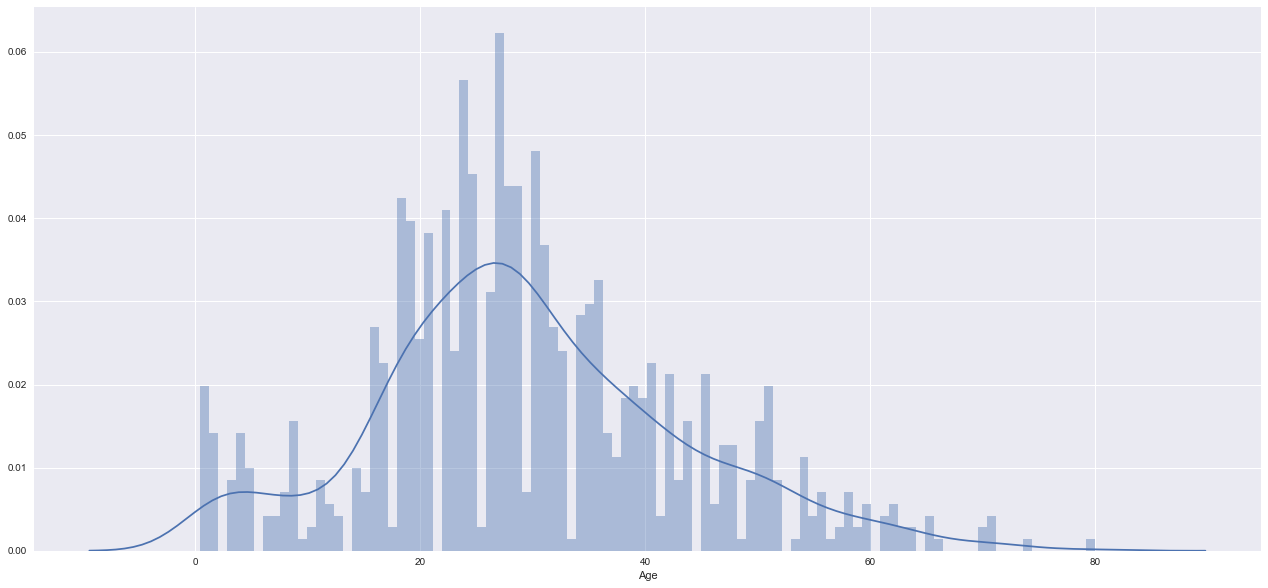

In [68]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100,kde=True, rug = False, norm_hist=False)

### age_group

We can create a new feature by grouping the "Age" column

In [70]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

In [71]:
test.head(5)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,...,age_group_teenager,age_group_toddler,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,34.5,1,0,0,1,7.829200,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,47.0,0,1,0,0,3.500000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,62.0,1,0,0,1,9.687500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27.0,1,0,0,1,8.662500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,22.0,0,1,1,0,4.095833,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Part 6- Pre-Modelling Task

### 6(a) -Separating dependent and independent variable

In [72]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

### 6(b) - Splitting data into train and test dataset

There are multiple ways of splitting data. They are...

1. train_test_split.
2. cross_validation.

We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, X_train, X_test, y_train, y_test.

X_train and y_train first used to train the algorithm.
then, X_test is used in that trained algorithms to predict outcomes.
Once we get the outcomes, we compare it with y_test
By comparing the outcome of the model with y_test, we can determine whether our algorithms are performing well or not. As we compare we use confusion matrix to determine different aspects of model performance.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)


### 6(c)- Feature Scaling

Feature scaling is an important concept of machine learning models. Often times a dataset contain features highly varying in magnitude and unit.

In [74]:
train.head(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,...,age_group_teenager,age_group_toddler,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,0,22.0,1,1,0,0,3.62500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,0,1,0,0,35.64165,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,0,0,1,7.92500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,0,1,0,0,26.55000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,1,0,0,1,8.05000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Here Age and Calculated_fare is much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking Age and Calculated_fare have higher weight than other features. Therefore, we need to do feature scaling to get a better result. There are multiple ways to do feature scaling.

**MinMaxScaler**-Scales the data using the max and min values so that it fits between 0 and 1.

**StandardScaler**-Scales the data so that it has mean 0 and variance of 1.

**RobustScaler**-Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.

I am using StandardScaler here now.


##### Before Scaling the data look like

In [75]:
headers = X_train.columns 

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,...,age_group_teenager,age_group_toddler,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
849,41.819333,0,1,0,0,44.5521,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


##### After Scaling the data 

In [76]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
pd.DataFrame(X_train_scaled, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,...,age_group_teenager,age_group_toddler,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.277950,0.725942,-0.464750,-0.463616,0.794901,0.554725,1.775907,-0.516260,-1.102913,-0.21395,...,-0.293127,-0.19144,-0.439057,-0.254,-0.116841,-0.299847,-0.101015,5.099020,-0.293127,-0.19144
1,1.128454,0.725942,-0.464750,-0.463616,0.794901,0.292298,1.775907,-0.516260,-1.102913,-0.21395,...,-0.293127,-0.19144,2.277608,-0.254,-0.116841,-0.299847,-0.101015,-0.196116,-0.293127,-0.19144
2,0.899944,-1.377520,0.356862,-0.463616,-1.258018,0.972044,1.775907,-0.516260,-1.102913,-0.21395,...,-0.293127,-0.19144,2.277608,-0.254,-0.116841,-0.299847,-0.101015,-0.196116,-0.293127,-0.19144
3,-0.883163,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.563093,-0.516260,0.906690,-0.21395,...,3.411495,-0.19144,-0.439057,-0.254,-0.116841,-0.299847,-0.101015,-0.196116,3.411495,-0.19144
4,-0.811320,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.563093,1.937008,-1.102913,-0.21395,...,3.411495,-0.19144,-0.439057,-0.254,-0.116841,-0.299847,-0.101015,-0.196116,3.411495,-0.19144


In [77]:
X_test_scaled = preprocessing.scale(X_test)

## Part 7- Modelling the Data

Since the problem we are trying to solve is a classification problem, we are going to use a bunch of classification model to get the best prediction possible. Let's start with Logistic Regression.

### 1. Logistic regression

In [78]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [79]:
## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))


So, Our accuracy Score is: 0.7755


### Plot Confusion Matrix

Confusion matrix, without normalization
[[149  28]
 [ 38  79]]
Normalized confusion matrix
[[0.84 0.16]
 [0.32 0.68]]


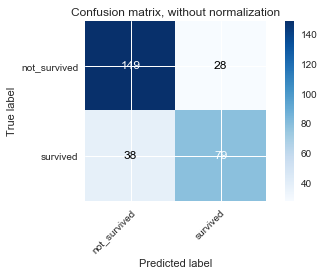

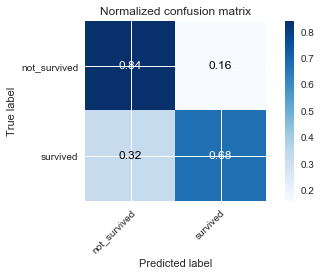

In [80]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


### K-NN Model

In [81]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

In [82]:
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.73 0.73 0.74 0.68 0.69 0.76 0.68 0.71 0.69 0.71]
Mean Cross-Validation accuracy score: 0.714


Manuallf find the best value of k for KNN

In [83]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.7045045045045044, 0.7018018018018019, 0.7067567567567568, 0.7058558558558559, 0.7144144144144146, 0.7157657657657658, 0.7234234234234235, 0.7171171171171171, 0.7270270270270272, 0.7238738738738739, 0.7279279279279278, 0.722972972972973, 0.7252252252252253, 0.7225225225225225, 0.7265765765765766, 0.7225225225225226, 0.722972972972973, 0.7166666666666666, 0.7193693693693693, 0.7162162162162161, 0.7153153153153153, 0.7076576576576576, 0.7072072072072071, 0.6986486486486486, 0.7045045045045045, 0.7067567567567568, 0.7090090090090091, 0.7081081081081081, 0.7076576576576576, 0.7081081081081082]

Mean accuracy score: 0.7145495495495495


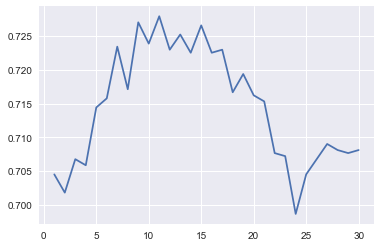

In [84]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

### Decission Tree Classifier using Grid Search

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [86]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 24}
0.8288288288288288
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=24, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [87]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8592342342342343

### Saving The result for Submission On Kaggle

In [88]:
result = dectree_grid.predict(test)

In [89]:
 submission=pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": result
    })

In [90]:
submission.to_csv("titanic1_submission.csv", index=False)